# Lab: the Bias-Variance tradeoff

In [334]:
import pandas as pd
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing the data

- define the target function $f(x) = \sin(\pi x)$ for $x\in [-1,1]$ and plot it
- define a function which extracts two points at random in $[-1,1]$ and their images under $f$
- plot two randomly selected points on the graph of $f$

In [335]:
L = -1
R = -L

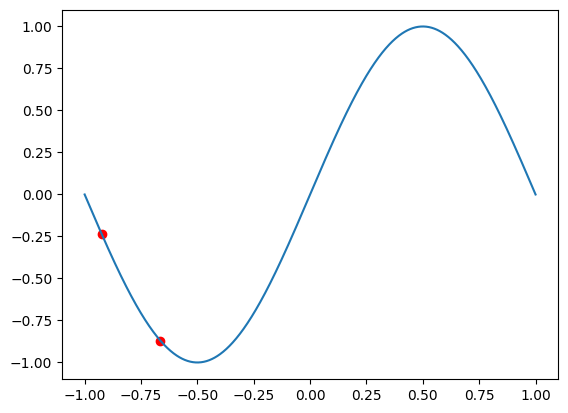

In [336]:
def f(x):
    return np.sin(np.pi*x)


t = np.linspace(L, R, 1000)
ft = f(t)

x = np.array([np.random.uniform(L, R) for i in range(2)])
y = f(x)


plt.plot(t, ft)
plt.scatter(x, y, c='r')
plt.show()

## The two models

We consider two models:
- $\mathcal{H}_0: h(x)= c$: a constant model (horizontal line)
- $\mathcal{H}_1: h(x)= ax+b$: a linear model (a line)

We will fit these models **on a data set made of two points** (as prepared below).

We will try to see which of the two models is the best for this task, *i.e* which one has a **lowest out-sample error**.

- store a data set made of two points from what you've done before
- intuitively which models captures best the trend of $f$?
- write a function which computes the models (based on two data points)
- plot your two models
- what are the in-sample errors of $\mathcal{H}_0$ and $\mathcal{H}_1$?
- what are the out-sample errors of $\mathcal{H}_0$ and $\mathcal{H}_1$?
- write functions which compute the out-sample errors for $\mathcal{H}_0$ and for $\mathcal{H}_1$

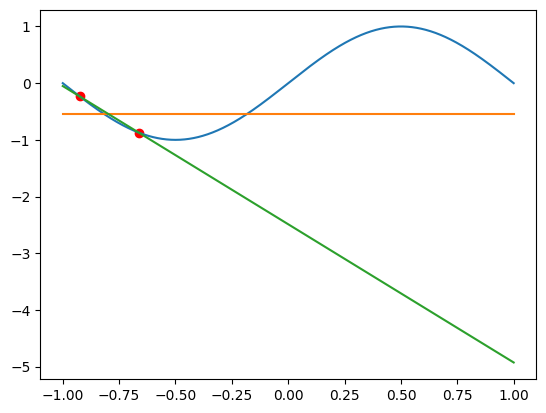

In [337]:
def h0_model(x, y):
    return lambda x: 0*x+y.mean()


def h1_model(x, y):
    a = (y[1]-y[0])/(x[1]-x[0])
    b = y[0]-a*x[0]
    return lambda x: a*x+b


h0 = h0_model(x, y)
h1 = h1_model(x, y)

plt.plot(t, ft)
plt.plot(t, h0(t))
plt.plot(t, h1(t))
plt.scatter(x, y, c='r')
plt.show()

In [338]:
E0_in = np.sum((h0(x)-f(x))**2)/len(x)
E0_out = 1/(R-L)*np.sum((R-L)/1000*((h0(t)-f(t))**2))

E0_in, E0_out, quad(lambda x: (h0(x)-f(x))**2, L, R)[0]/(R-L)

(np.float64(0.10146902672975255),
 np.float64(0.8044721608147272),
 0.8049721608147272)

In [339]:
E1_in = np.sum((h1(x)-f(x))**2)/len(x)
E1_out = 1/(R-L)*np.sum((R-L)/1000*((h1(t)-f(t))**2))

E1_in, E1_out, quad(lambda x: (h1(x)-f(x))**2, L, R)[0]/(R-L)

(np.float64(3.0814879110195774e-32),
 np.float64(10.229215663934351),
 10.227306103222226)

The out-sample error is the integral of $(h_{0/1}(x)-f(x))^2$ over $x$ in $[-1,1]$.

We approximate this integral by a discrete sum of rectangles over a grid, like this

<img src="midpoint.gif">


## Estimating the bias and the variance

Remember from class that the out-sample error of a model $g$, learning a target $f$ on a data set $\mathcal{D}$ is given by:

$$
E_{out}(g^{(\mathcal{D})}) = \mathbb{E}_{x\in\mathcal{D}} \left[\left( g^{(\mathcal{D})}(x) -f(x)\right)^2 \right]
$$


And the expectation of the out-sample error of the model $g$, over all a data sets $\mathcal{D}$, splits into biais and variance components:

$$
\mathbb{E}_{\mathcal{D}} \left[ E_{out}(g^{(\mathcal{D})}) \right] = 
\mathrm{bias} + \mathrm{var}
$$

where

$$
\mathrm{bias} = \mathbb{E}_{x} \left[ \left( \overline{g}(x) -f(x) \right)^2 \right] 
$$

where $\overline{g} = \mathbb{E}_{x} \left[ g^{(\mathcal{D})} \right]$ is the mean model over all data sets, and

$$
\mathrm{var} = \mathbb{E}_{x} \left[ \mathbb{E}_{\mathcal{D}} \left[ \left( g^{(\mathcal{D})}(x) -\overline{g} \right)^2 \right] \right]
$$





- run 1000 such fits, or more, choosing two new random data points at each step
- for both $\mathcal{H}_0$ and $\mathcal{H}_1$ average out the 1000 models, this gives you estimates of $\overline{h}_0$ and $\overline{h}_1$ 
- plot $\overline{h}_0$ and $\overline{h}_1$ together with $f$
- derive the biaises of $\mathcal{H}_0$ and $\mathcal{H}_1$
- estimate the variances of $\mathcal{H}_0$ and $\mathcal{H}_1$. Hint: consider the "variance" of your 1000 models $h_{0/1}$ with respect to the mean model $\overline{h}_{0/1}$.
- what are your conclusions?

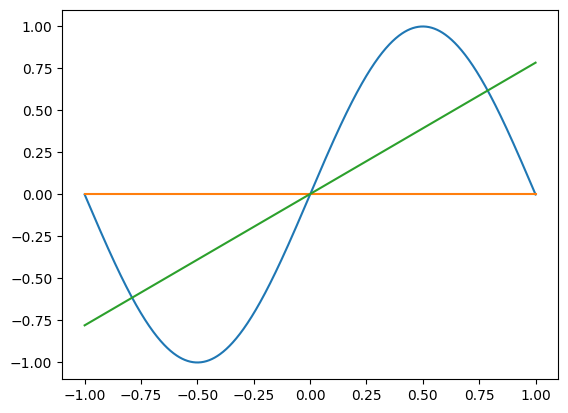

In [340]:
xs = []
ys = []
Var0 = 0
Var1 = 0

for i in range(100000):
    _x = np.array([np.random.uniform(L, R) for i in range(2)])
    _y = f(_x)
    xs.append(_x)
    ys.append(_y)


def h0_mean_model(xs, ys):
    global Var0
    Var0 = np.mean(ys, axis=1).var()
    return lambda x: 0*x+np.mean(ys, axis=1).mean()


def h1_mean_model(xs, ys):
    global Var1
    a = np.mean(np.array([(y[1]-y[0])/(x[1]-x[0]) for x, y in zip(xs, ys)]))
    b = np.mean(np.array([y[0]-(y[1]-y[0])/(x[1]-x[0])*x[0]
                for x, y in zip(xs, ys)]))
    Var1 = np.mean([np.var(np.array([(y[1]-y[0])/(x[1]-x[0]) for x, y in zip(xs, ys)])),
                    np.var(np.array([y[0]-(y[1]-y[0])/(x[1]-x[0])*x[0]
                                     for x, y in zip(xs, ys)]))])
    return lambda x: a*x+b


h0_mean = h0_mean_model(xs, ys)
h1_mean = h1_mean_model(xs, ys)

plt.plot(t, ft)
plt.plot(t, h0_mean(t))
plt.plot(t, h1_mean(t))
plt.show()

In [341]:
E0mean_out = 1/(R-L)*np.sum((R-L)/1000*((h0_mean(t)-f(t))**2))

E0mean_out, quad(lambda x: (h0_mean(x)-f(x))**2, L, R)[0]/(R-L)

(np.float64(0.4995021093866433), 0.5000021093866432)

In [342]:
E1mean_out = 1/(R-L)*np.sum((R-L)/1000*((h1_mean(t)-f(t))**2))

E1mean_out, quad(lambda x: (h1_mean(x)-f(x))**2, L, R)[0]/(R-L)

(np.float64(0.2064481074762922), 0.2060409523192387)

In [343]:
Var0, Var1

(np.float64(0.24917006743373699), np.float64(1.5919418484119627))

**Conclusion: match the "model complexity" to the data ressources, not the target complexity.**